In [29]:
import numpy as np
import matplotlib.pyplot as plt
from ckine.model import runCkineU_IL2, getTotalActiveCytokine

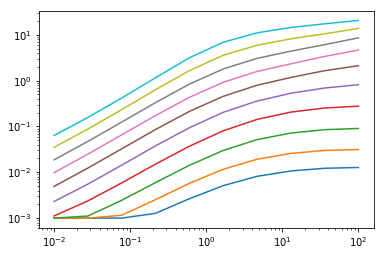

In [59]:
def funcc(input, IL):
    tps = np.array([24.0*60.0*60.0])
    
    # IL, kfwd, k1rev, k2rev, k4rev, k5rev, k11rev, R, R, R
    rxntfr = np.array([IL, 0.00449, 0.6*10*input[0],
                       0.6*144*input[1], 8.6677, 0.1233,
                       63.0 * 0.1233 / 1.5 * input[1], 3.8704, 0.734, 1.7147])
    
    yOut, retVal = runCkineU_IL2(tps, rxntfr)
    
    assert retVal == 0
    
    active = getTotalActiveCytokine(0, np.squeeze(yOut))
    
    return active

def dRespon(input):
    ILs = np.logspace(-3.0, 2.0)
    activee = np.zeros_like(ILs)

    for ii, item in enumerate(ILs):
        activee[ii] = funcc(input, item)
        
    return ILs, activee


def IC50(x, y):
    pt = np.interp(np.max(y) / 2.0, y, x)
    
    return pt

changess = np.logspace(-2, 2, num=10)
output = np.zeros((10, 10))

for i, itemA in enumerate(changess):
    for j, itemB in enumerate(changess):
        ILs, BB = dRespon([itemA, itemB])
        
        IC = IC50(ILs, BB)
        
        output[i, j] = IC
        
plt.loglog(changess, output);